In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# fix random seed for reproducibility
tf.random.set_seed(7)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
 
a=pd.read_csv('1ToyotaBattDatacorrected.csv')
a.head()

c:\users\saikiran\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\saikiran\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\saikiran\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\s

AttributeError: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

In [2]:
import numpy as np
s = []
for i in range(1008):
    ac = a[a['cycle'] == (i+1)]['SoH']
    k = np.mean(ac)
    s.append(k)
shi = pd.DataFrame({'SoH':s})

In [3]:
k = shi.iloc[:,:]
k = np.array(k)
k = k.flatten()
len(k)

1008

In [4]:
aa = pd.DataFrame({'index':list(np.arange(1008)),'SoH':k})
aa

,index,SoH
0,0,0.774642
1,1,0.773713
2,2,0.773076
3,3,0.773143
4,4,0.772612
...,...,...
1003,1003,0.655975
1004,1004,0.654306
1005,1005,0.652531
1006,1006,0.652455


In [5]:
# load the dataset
dataframe = aa['SoH']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(1008,1))

## For 60 cycles

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.94)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

947 61


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
945/945 - 2s - loss: 0.0424 - 2s/epoch - 2ms/step
Epoch 2/100
945/945 - 1s - loss: 0.0032 - 1s/epoch - 1ms/step
Epoch 3/100
945/945 - 1s - loss: 6.9453e-04 - 961ms/epoch - 1ms/step
Epoch 4/100
945/945 - 1s - loss: 2.7731e-04 - 943ms/epoch - 997us/step
Epoch 5/100
945/945 - 1s - loss: 2.7307e-04 - 924ms/epoch - 978us/step
Epoch 6/100
945/945 - 1s - loss: 2.7484e-04 - 864ms/epoch - 915us/step
Epoch 7/100
945/945 - 1s - loss: 2.7345e-04 - 871ms/epoch - 922us/step
Epoch 8/100
945/945 - 1s - loss: 2.7462e-04 - 848ms/epoch - 897us/step
Epoch 9/100
945/945 - 1s - loss: 2.8513e-04 - 835ms/epoch - 884us/step
Epoch 10/100
945/945 - 1s - loss: 2.7967e-04 - 915ms/epoch - 969us/step
Epoch 11/100
945/945 - 1s - loss: 2.7099e-04 - 847ms/epoch - 897us/step
Epoch 12/100
945/945 - 1s - loss: 2.7727e-04 - 869ms/epoch - 920us/step
Epoch 13/100
945/945 - 1s - loss: 2.8247e-04 - 856ms/epoch - 906us/step
Epoch 14/100
945/945 - 1s - loss: 2.7809e-04 - 835ms/epoch - 883us/step
Epoch 15/100
945/945 

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 7ms/step
Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


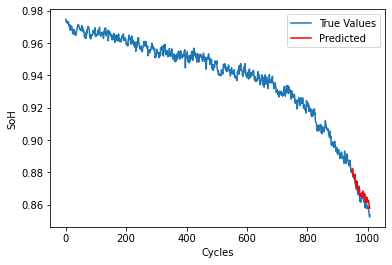

MSE: 1.2847408109718497e-05


In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)+0.2)
#plt.plot(trainPredictPlot,color='b')
plt.plot(testPredictPlot+0.2,color='r')
plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.legend(['True Values','Predicted'])
plt.show()
print('MSE:',mean_squared_error(testY.T, testPredict))

In [14]:
len(testY.T)

59

In [15]:
len(testPredict)

59

Text(0, 0.5, 'SoH')

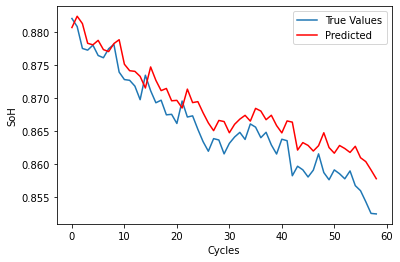

In [16]:
plt.plot(testY.T+0.2)
plt.plot(testPredict+0.2,color='r')
plt.legend(['True Values','Predicted'])
plt.xlabel('Cycles')
plt.ylabel('SoH')

In [17]:
np.sqrt(mean_squared_error(testY.T+.2, testPredict+0.2))

0.00358431826354656

In [18]:
rmse1 = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
mse1 = mean_squared_error(testY.T, testPredict)
mae1 = mean_absolute_error(testY.T, testPredict)
rmsep1 = np.sqrt(np.mean(np.square(((testY.T - testPredict) / testY.T)), axis=0))
print('RMSEP1:', rmsep1)
print('rmse1:', rmse1)
print('mse1:', mse1)
print('mae1:', mae1)

RMSEP1: [0.00541974]
rmse1: 0.0035843281252863133
mse1: 1.2847408109718497e-05
mae1: 0.0031278266060830247


## For 70 cycles

In [19]:
# split into train and test sets
train_size = int(len(dataset) * 0.93)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

937 71


In [20]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [21]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
935/935 - 2s - loss: 0.1177 - 2s/epoch - 2ms/step
Epoch 2/100
935/935 - 1s - loss: 0.0096 - 918ms/epoch - 982us/step
Epoch 3/100
935/935 - 1s - loss: 0.0048 - 852ms/epoch - 911us/step
Epoch 4/100
935/935 - 1s - loss: 0.0015 - 861ms/epoch - 921us/step
Epoch 5/100
935/935 - 1s - loss: 3.8713e-04 - 852ms/epoch - 911us/step
Epoch 6/100
935/935 - 1s - loss: 2.6879e-04 - 861ms/epoch - 921us/step
Epoch 7/100
935/935 - 1s - loss: 2.7711e-04 - 851ms/epoch - 910us/step
Epoch 8/100
935/935 - 1s - loss: 2.7206e-04 - 838ms/epoch - 896us/step
Epoch 9/100
935/935 - 1s - loss: 2.7627e-04 - 911ms/epoch - 974us/step
Epoch 10/100
935/935 - 1s - loss: 2.7903e-04 - 838ms/epoch - 896us/step
Epoch 11/100
935/935 - 1s - loss: 2.8526e-04 - 858ms/epoch - 918us/step
Epoch 12/100
935/935 - 1s - loss: 2.8480e-04 - 887ms/epoch - 949us/step
Epoch 13/100
935/935 - 1s - loss: 2.8589e-04 - 848ms/epoch - 907us/step
Epoch 14/100
935/935 - 1s - loss: 2.9052e-04 - 857ms/epoch - 916us/step
Epoch 15/100
935/935 -

In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 2ms/step
Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


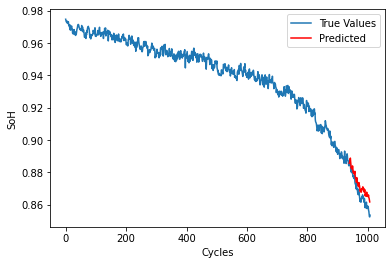

MSE: 3.260754059912989e-05


In [24]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)+0.2)
#plt.plot(trainPredictPlot,color='b')
plt.plot(testPredictPlot+0.2,color='r')
plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.legend(['True Values','Predicted'])
plt.show()
print('MSE:',mean_squared_error(testY.T, testPredict))

In [25]:
len(testY.T)

69

In [26]:
len(testPredict)

69

Text(0, 0.5, 'SoH')

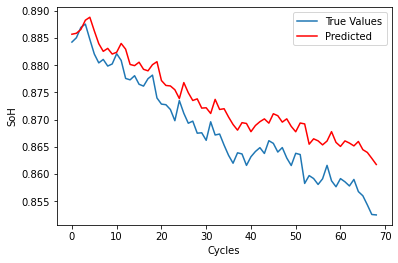

In [27]:
plt.plot(testY.T+0.2)
plt.plot(testPredict+0.2,color='r')
plt.legend(['True Values','Predicted'])
plt.xlabel('Cycles')
plt.ylabel('SoH')

In [28]:
rmse2 = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
mse2 = mean_squared_error(testY.T, testPredict)
mae2 = mean_absolute_error(testY.T, testPredict)
rmsep2 = np.sqrt(np.mean(np.square(((testY.T - testPredict) / testY.T)), axis=0))
print('RMSEP:', rmsep2)
print('rmse2:', rmse2)
print('mse2:', mse2)
print('mae2:', mae2)

RMSEP: [0.00862394]
rmse2: 0.0057103012704348526
mse2: 3.260754059912989e-05
mae2: 0.0051126073457054624


## For 80 cycles

In [29]:
# split into train and test sets
train_size = int(len(dataset) * 0.92)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

927 81


In [30]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
925/925 - 2s - loss: 0.0962 - 2s/epoch - 2ms/step
Epoch 2/100
925/925 - 1s - loss: 0.0085 - 862ms/epoch - 932us/step
Epoch 3/100
925/925 - 1s - loss: 0.0044 - 846ms/epoch - 914us/step
Epoch 4/100
925/925 - 1s - loss: 0.0015 - 839ms/epoch - 907us/step
Epoch 5/100
925/925 - 1s - loss: 4.2623e-04 - 835ms/epoch - 903us/step
Epoch 6/100
925/925 - 1s - loss: 2.6595e-04 - 817ms/epoch - 884us/step
Epoch 7/100
925/925 - 1s - loss: 2.6931e-04 - 825ms/epoch - 891us/step
Epoch 8/100
925/925 - 1s - loss: 2.6961e-04 - 832ms/epoch - 899us/step
Epoch 9/100
925/925 - 1s - loss: 2.7547e-04 - 846ms/epoch - 915us/step
Epoch 10/100
925/925 - 1s - loss: 2.8087e-04 - 831ms/epoch - 898us/step
Epoch 11/100
925/925 - 1s - loss: 2.8344e-04 - 828ms/epoch - 895us/step
Epoch 12/100
925/925 - 1s - loss: 2.7590e-04 - 831ms/epoch - 898us/step
Epoch 13/100
925/925 - 1s - loss: 2.7380e-04 - 829ms/epoch - 897us/step
Epoch 14/100
925/925 - 1s - loss: 2.7123e-04 - 824ms/epoch - 891us/step
Epoch 15/100
925/925 -

In [33]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 3ms/step
Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


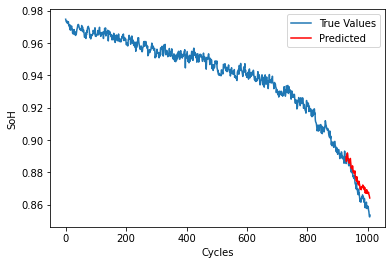

MSE: 4.1533145749256614e-05


In [34]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)+0.2)
#plt.plot(trainPredictPlot,color='b')
plt.plot(testPredictPlot+0.2,color='r')
plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.legend(['True Values','Predicted'])
plt.show()
print('MSE:',mean_squared_error(testY.T, testPredict))

Text(0, 0.5, 'SoH')

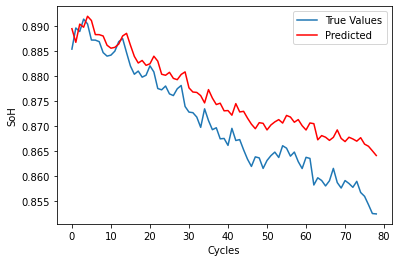

In [35]:
plt.plot(testY.T+0.2)
plt.plot(testPredict+0.2,color='r')
plt.legend(['True Values','Predicted'])
plt.xlabel('Cycles')
plt.ylabel('SoH')

In [36]:
rmse3 = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
mse3 = mean_squared_error(testY.T, testPredict)
mae3 = mean_absolute_error(testY.T, testPredict)
rmsep3 = np.sqrt(np.mean(np.square(((testY.T - testPredict) / testY.T)), axis=0))
print('RMSEP3:', rmsep3)
print('rmse3:', rmse3)
print('mse3:', mse3)
print('mae3:', mae3)

RMSEP3: [0.00973331]
rmse3: 0.0064446214589575865
mse3: 4.1533145749256614e-05
mae3: 0.005619934950159669


## For 90 cycles

In [37]:
# split into train and test sets
train_size = int(len(dataset) * 0.91)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

917 91


In [38]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [39]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [40]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
915/915 - 2s - loss: 0.1167 - 2s/epoch - 2ms/step
Epoch 2/100
915/915 - 1s - loss: 0.0109 - 839ms/epoch - 917us/step
Epoch 3/100
915/915 - 1s - loss: 0.0063 - 906ms/epoch - 990us/step
Epoch 4/100
915/915 - 1s - loss: 0.0027 - 849ms/epoch - 927us/step
Epoch 5/100
915/915 - 1s - loss: 8.0810e-04 - 840ms/epoch - 918us/step
Epoch 6/100
915/915 - 1s - loss: 3.1468e-04 - 851ms/epoch - 930us/step
Epoch 7/100
915/915 - 1s - loss: 2.7815e-04 - 817ms/epoch - 893us/step
Epoch 8/100
915/915 - 1s - loss: 2.8242e-04 - 820ms/epoch - 896us/step
Epoch 9/100
915/915 - 1s - loss: 2.7924e-04 - 817ms/epoch - 892us/step
Epoch 10/100
915/915 - 1s - loss: 2.8584e-04 - 813ms/epoch - 888us/step
Epoch 11/100
915/915 - 1s - loss: 2.7295e-04 - 820ms/epoch - 897us/step
Epoch 12/100
915/915 - 1s - loss: 2.8184e-04 - 809ms/epoch - 884us/step
Epoch 13/100
915/915 - 1s - loss: 2.7562e-04 - 809ms/epoch - 884us/step
Epoch 14/100
915/915 - 1s - loss: 2.8003e-04 - 811ms/epoch - 887us/step
Epoch 15/100
915/915 -

In [41]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 3ms/step
Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


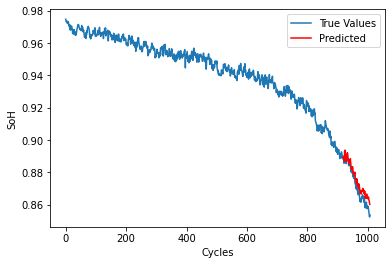

MSE: 1.931154382054661e-05


In [42]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)+0.2)
#plt.plot(trainPredictPlot,color='b')
plt.plot(testPredictPlot+0.2,color='r')
plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.legend(['True Values','Predicted'])
plt.show()
print('MSE:',mean_squared_error(testY.T, testPredict))

Text(0, 0.5, 'SoH')

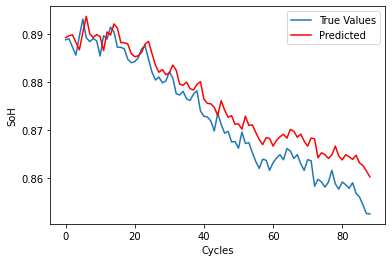

In [43]:
plt.plot(testY.T+0.2)
plt.plot(testPredict+0.2,color='r')
plt.legend(['True Values','Predicted'])
plt.xlabel('Cycles')
plt.ylabel('SoH')

In [44]:
rmse4 = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
mse4 = mean_squared_error(testY.T, testPredict)
mae4 = mean_absolute_error(testY.T, testPredict)
rmsep4 = np.sqrt(np.mean(np.square(((testY.T - testPredict) / testY.T)), axis=0))
print('RMSEP4:', rmsep4)
print('rmse4:', rmse4)
print('mse4:', mse4)
print('mae4:', mae4)

RMSEP4: [0.00661937]
rmse4: 0.004394490166167927
mse4: 1.931154382054661e-05
mae4: 0.0037742200320339927


## For 100 cycles

In [45]:
# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

907 101


In [46]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [47]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [48]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
905/905 - 2s - loss: 0.0748 - 2s/epoch - 2ms/step
Epoch 2/100
905/905 - 1s - loss: 0.0054 - 855ms/epoch - 945us/step
Epoch 3/100
905/905 - 1s - loss: 0.0024 - 817ms/epoch - 903us/step
Epoch 4/100
905/905 - 1s - loss: 7.4766e-04 - 863ms/epoch - 953us/step
Epoch 5/100
905/905 - 1s - loss: 3.3599e-04 - 853ms/epoch - 942us/step
Epoch 6/100
905/905 - 1s - loss: 2.9793e-04 - 827ms/epoch - 914us/step
Epoch 7/100
905/905 - 1s - loss: 2.9977e-04 - 828ms/epoch - 915us/step
Epoch 8/100
905/905 - 1s - loss: 3.0074e-04 - 832ms/epoch - 920us/step
Epoch 9/100
905/905 - 1s - loss: 3.1381e-04 - 850ms/epoch - 939us/step
Epoch 10/100
905/905 - 1s - loss: 2.9603e-04 - 845ms/epoch - 933us/step
Epoch 11/100
905/905 - 1s - loss: 3.0110e-04 - 842ms/epoch - 931us/step
Epoch 12/100
905/905 - 1s - loss: 3.1068e-04 - 837ms/epoch - 925us/step
Epoch 13/100
905/905 - 1s - loss: 3.0467e-04 - 845ms/epoch - 934us/step
Epoch 14/100
905/905 - 1s - loss: 2.9791e-04 - 818ms/epoch - 904us/step
Epoch 15/100
905/9

In [49]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 [==============================] - 0s 3ms/step
Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


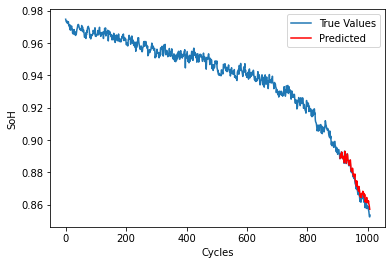

MSE: 8.464024277189299e-06


In [50]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)+0.2)
#plt.plot(trainPredictPlot,color='b')
plt.plot(testPredictPlot+0.2,color='r')
plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.legend(['True Values','Predicted'])
plt.show()
print('MSE:',mean_squared_error(testY.T, testPredict))

Text(0, 0.5, 'SoH')

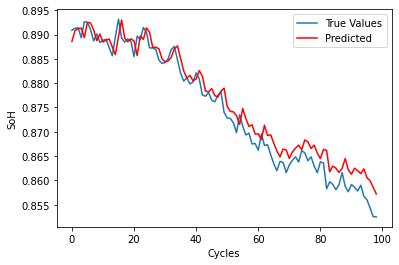

In [51]:
plt.plot(testY.T+0.2)
plt.plot(testPredict+0.2,color='r')
plt.legend(['True Values','Predicted'])
plt.xlabel('Cycles')
plt.ylabel('SoH')

In [52]:
rmse5 = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
mse5 = mean_squared_error(testY.T, testPredict)
mae5 = mean_absolute_error(testY.T, testPredict)
rmsep5 = np.sqrt(np.mean(np.square(((testY.T - testPredict) / testY.T)), axis=0))
print('RMSEP5:', rmsep5)
print('rmse5:', rmse5)
print('mse5:', mse5)
print('mae5:', mae5)

RMSEP5: [0.00436481]
rmse5: 0.00290929961970047
mse5: 8.464024277189299e-06
mae5: 0.002396936292282607


## For 110 cycles

In [53]:
# split into train and test sets
train_size = int(len(dataset) * 0.89)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

897 111


In [54]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [55]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
895/895 - 2s - loss: 0.1173 - 2s/epoch - 2ms/step
Epoch 2/100
895/895 - 1s - loss: 0.0088 - 829ms/epoch - 926us/step
Epoch 3/100
895/895 - 1s - loss: 0.0052 - 809ms/epoch - 904us/step
Epoch 4/100
895/895 - 1s - loss: 0.0023 - 819ms/epoch - 916us/step
Epoch 5/100
895/895 - 1s - loss: 7.2306e-04 - 835ms/epoch - 933us/step
Epoch 6/100
895/895 - 1s - loss: 3.1610e-04 - 859ms/epoch - 960us/step
Epoch 7/100
895/895 - 1s - loss: 2.7769e-04 - 803ms/epoch - 897us/step
Epoch 8/100
895/895 - 1s - loss: 2.8015e-04 - 808ms/epoch - 903us/step
Epoch 9/100
895/895 - 1s - loss: 2.8962e-04 - 804ms/epoch - 898us/step
Epoch 10/100
895/895 - 1s - loss: 2.8747e-04 - 814ms/epoch - 909us/step
Epoch 11/100
895/895 - 1s - loss: 2.7149e-04 - 801ms/epoch - 895us/step
Epoch 12/100
895/895 - 1s - loss: 2.8299e-04 - 801ms/epoch - 895us/step
Epoch 13/100
895/895 - 1s - loss: 2.8398e-04 - 806ms/epoch - 901us/step
Epoch 14/100
895/895 - 1s - loss: 2.7660e-04 - 799ms/epoch - 893us/step
Epoch 15/100
895/895 -

In [56]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 [==============================] - 0s 1ms/step
Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


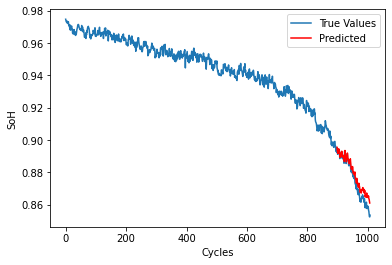

MSE: 1.9210158122971948e-05


In [57]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)+0.2)
#plt.plot(trainPredictPlot,color='b')
plt.plot(testPredictPlot+0.2,color='r')
plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.legend(['True Values','Predicted'])
plt.show()
print('MSE:',mean_squared_error(testY.T, testPredict))

Text(0, 0.5, 'SoH')

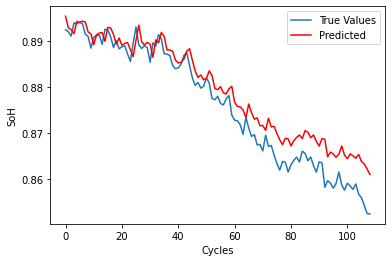

In [58]:
plt.plot(testY.T+0.2)
plt.plot(testPredict+0.2,color='r')
plt.legend(['True Values','Predicted'])
plt.xlabel('Cycles')
plt.ylabel('SoH')

In [59]:
rmse6 = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
mse6 = mean_squared_error(testY.T, testPredict)
mae6 = mean_absolute_error(testY.T, testPredict)
rmsep6 = np.sqrt(np.mean(np.square(((testY.T - testPredict) / testY.T)), axis=0))
print('RMSEP6:', rmsep6)
print('rmse6:', rmse6)
print('mse6:', mse6)
print('mae6:', mae6)

RMSEP6: [0.00659883]
rmse6: 0.004382939438661222
mse6: 1.9210158122971948e-05
mae6: 0.0036066495388392865


## For 120 cycles

In [60]:
# split into train and test sets
train_size = int(len(dataset) * 0.88)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

887 121


In [61]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [62]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
885/885 - 2s - loss: 0.0898 - 2s/epoch - 2ms/step
Epoch 2/100
885/885 - 1s - loss: 0.0060 - 781ms/epoch - 883us/step
Epoch 3/100
885/885 - 1s - loss: 0.0037 - 788ms/epoch - 890us/step
Epoch 4/100
885/885 - 1s - loss: 0.0017 - 787ms/epoch - 890us/step
Epoch 5/100
885/885 - 1s - loss: 6.6417e-04 - 778ms/epoch - 879us/step
Epoch 6/100
885/885 - 1s - loss: 3.1445e-04 - 789ms/epoch - 892us/step
Epoch 7/100
885/885 - 1s - loss: 2.6993e-04 - 792ms/epoch - 895us/step
Epoch 8/100
885/885 - 1s - loss: 2.6756e-04 - 795ms/epoch - 898us/step
Epoch 9/100
885/885 - 1s - loss: 2.6333e-04 - 788ms/epoch - 890us/step
Epoch 10/100
885/885 - 1s - loss: 2.7272e-04 - 786ms/epoch - 889us/step
Epoch 11/100
885/885 - 1s - loss: 2.8193e-04 - 792ms/epoch - 895us/step
Epoch 12/100
885/885 - 1s - loss: 2.6740e-04 - 790ms/epoch - 893us/step
Epoch 13/100
885/885 - 1s - loss: 2.7255e-04 - 784ms/epoch - 886us/step
Epoch 14/100
885/885 - 1s - loss: 2.7790e-04 - 796ms/epoch - 899us/step
Epoch 15/100
885/885 -

In [63]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 [==============================] - 0s 1ms/step
Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


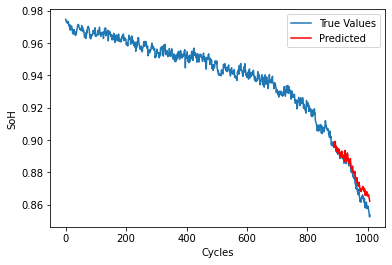

MSE: 2.2205736395842784e-05


In [64]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)+0.2)
#plt.plot(trainPredictPlot,color='b')
plt.plot(testPredictPlot+0.2,color='r')
plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.legend(['True Values','Predicted'])
plt.show()
print('MSE:',mean_squared_error(testY.T, testPredict))

Text(0, 0.5, 'SoH')

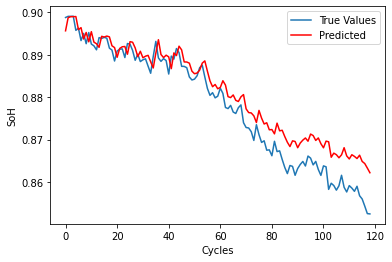

In [65]:
plt.plot(testY.T+0.2)
plt.plot(testPredict+0.2,color='r')
plt.legend(['True Values','Predicted'])
plt.xlabel('Cycles')
plt.ylabel('SoH')

In [66]:
rmse7 = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
mse7 = mean_squared_error(testY.T, testPredict)
mae7 = mean_absolute_error(testY.T, testPredict)
rmsep7 = np.sqrt(np.mean(np.square(((testY.T - testPredict) / testY.T)), axis=0))
print('RMSEP7:', rmsep7)
print('rmse7:', rmse7)
print('mse7:', mse7)
print('mae7:', mae7)

RMSEP7: [0.00709403]
rmse7: 0.004712296297543564
mse7: 2.2205736395842784e-05
mae7: 0.0038160529155158063


## For 60 cycles

In [67]:
print('rmse1:', rmse1)
print('mse1:', mse1)
print('mae1:', mae1)
print('RMSEP1:', rmsep1[0])

rmse1: 0.0035843281252863133
mse1: 1.2847408109718497e-05
mae1: 0.0031278266060830247
RMSEP1: 0.005419742060777656


## For 70 cycles

In [68]:
print('rmse2:', rmse2)
print('mse2:', mse2)
print('mae2:', mae2)
print('RMSEP2:', rmsep2[0])

rmse2: 0.0057103012704348526
mse2: 3.260754059912989e-05
mae2: 0.0051126073457054624
RMSEP2: 0.008623942500755353


## For 80 cycles

In [69]:
print('rmse3:', rmse3)
print('mse3:', mse3)
print('mae3:', mae3)
print('RMSEP3:', rmsep3[0])

rmse3: 0.0064446214589575865
mse3: 4.1533145749256614e-05
mae3: 0.005619934950159669
RMSEP3: 0.009733305347340092


## For 90 cycles

In [70]:
print('rmse4:', rmse4)
print('mse4:', mse4)
print('mae4:', mae4)
print('RMSEP4:', rmsep4[0])

rmse4: 0.004394490166167927
mse4: 1.931154382054661e-05
mae4: 0.0037742200320339927
RMSEP4: 0.006619365289726818


## For 100 cycles

In [71]:
print('rmse5:', rmse5)
print('mse5:', mse5)
print('mae5:', mae5)
print('RMSEP5:', rmsep5[0])

rmse5: 0.00290929961970047
mse5: 8.464024277189299e-06
mae5: 0.002396936292282607
RMSEP5: 0.004364814314106548


## For 110 cycles

In [72]:
print('rmse6:', rmse6)
print('mse6:', mse6)
print('mae6:', mae6)
print('RMSEP6:', rmsep6[0])

rmse6: 0.004382939438661222
mse6: 1.9210158122971948e-05
mae6: 0.0036066495388392865
RMSEP6: 0.006598825195946319


## For 120 cycles

In [73]:
print('rmse7:', rmse7)
print('mse7:', mse7)
print('mae7:', mae7)
print('RMSEP7:', rmsep7[0])

rmse7: 0.004712296297543564
mse7: 2.2205736395842784e-05
mae7: 0.0038160529155158063
RMSEP7: 0.007094033251269254


## Comparision

In [74]:
df = pd.DataFrame({'cycles' : [60, 70, 80, 90, 100, 110, 120],
                 'rmse' : [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7],
                 'mse' : [mse1, mse2, mse3, mse4, mse5, mse6, mse7],
                 'mae' : [mae1, mae2, mae3, mae4, mae5, mae6, mae7],
                 'rmsep' : [rmsep1[0], rmsep2[0], rmsep3[0], rmsep4[0], rmsep5[0], rmsep6[0], rmsep7[0]] })
df

,cycles,rmse,mse,mae,rmsep
0,60,0.003584,0.000013,0.003128,0.005420
1,70,0.005710,0.000033,0.005113,0.008624
2,80,0.006445,0.000042,0.005620,0.009733
3,90,0.004394,0.000019,0.003774,0.006619
4,100,0.002909,0.000008,0.002397,0.004365
5,110,0.004383,0.000019,0.003607,0.006599
6,120,0.004712,0.000022,0.003816,0.007094


## Cycles vs RMSE

<AxesSubplot:xlabel='cycles', ylabel='rmse'>

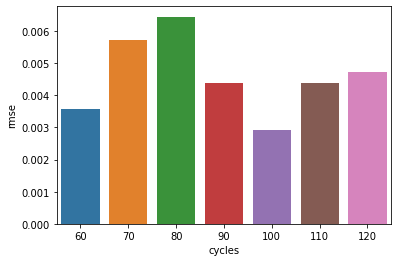

In [75]:
import seaborn as sns
sns.barplot(data=df, x="cycles", y="rmse")

## Cycles vs MSE

<AxesSubplot:xlabel='cycles', ylabel='mse'>

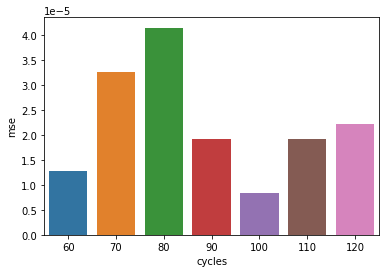

In [76]:
sns.barplot(data=df, x="cycles", y="mse")

## Cycles vs MAE

<AxesSubplot:xlabel='cycles', ylabel='mae'>

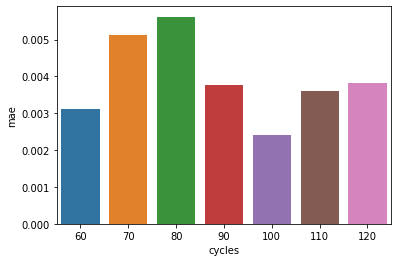

In [77]:
sns.barplot(data=df, x="cycles", y="mae")

## Cycles vs RMSEP

<AxesSubplot:xlabel='cycles', ylabel='rmsep'>

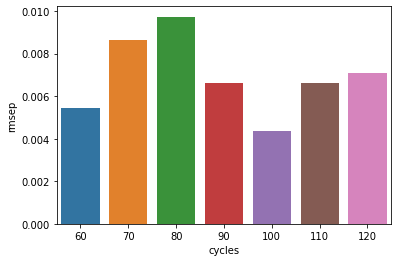

In [78]:
sns.barplot(data=df, x="cycles", y="rmsep")

In [79]:
df1 = pd.DataFrame({'cycles' : [60, 70, 80, 90, 100, 110, 120, 60, 70, 80, 90, 100, 110, 120, 60, 70, 80, 90, 100, 110, 120, 60, 70, 80, 90, 100, 110, 120],
                 'error_type' : ['rmse', 'rmse', 'rmse', 'rmse', 'rmse', 'rmse', 'rmse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'rmsep', 'rmsep', 'rmsep', 'rmsep', 'rmsep', 'rmsep', 'rmsep'], 
                 'error' : [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, mse1, mse2, mse3, mse4, mse5, mse6, mse7, mae1, mae2, mae3, mae4, mae5, mae6, mae7, rmsep1[0], rmsep2[0], rmsep3[0], rmsep4[0], rmsep5[0], rmsep6[0], rmsep7[0]]})
df1

,cycles,error_type,error
0,60,rmse,0.003584
1,70,rmse,0.005710
2,80,rmse,0.006445
3,90,rmse,0.004394
4,100,rmse,0.002909
5,110,rmse,0.004383
6,120,rmse,0.004712
7,60,mse,0.000013
8,70,mse,0.000033
9,80,mse,0.000042


<AxesSubplot:xlabel='cycles', ylabel='error'>

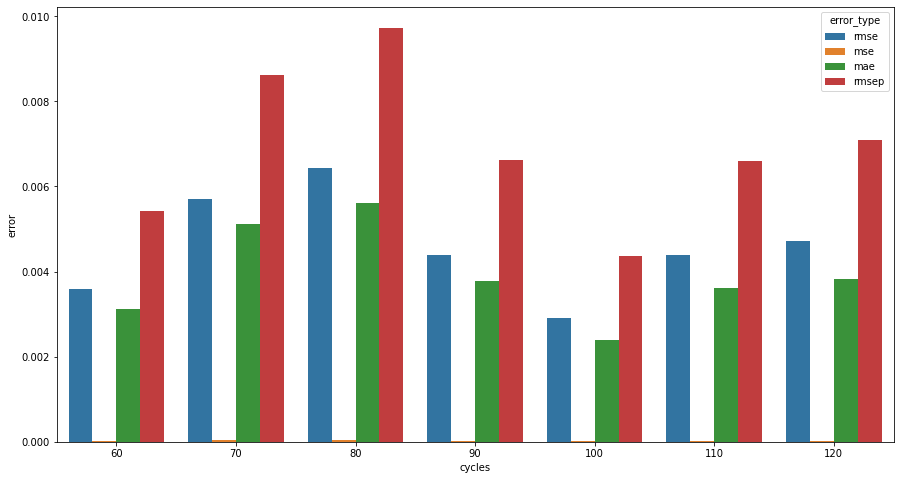

In [80]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(data=df1, x="cycles", y="error", hue="error_type")

In [81]:
df.to_csv('Cycle_prediction_graphs.csv')